# The Barnsley Fern

https://en.wikipedia.org/wiki/Barnsley_fern


![IMG](https://upload.wikimedia.org/wikipedia/commons/e/ee/Sa-fern.jpg)

_Fern plants at Muir Woods, California; 28 May 2007; Sanjay Ach_ (CC BY-SA 3.0)


The fern is one of the basic examples of self-similar sets, i.e. it is a mathematically generated pattern that can be reproducible at any magnification or reduction. Like the Sierpinski triangle, the Barnsley fern shows how graphically beautiful structures can be built from repetitive uses of mathematical formulas with computers. Barnsley's 1988 book Fractals Everywhere is based on the course which he taught for undergraduate and graduate students in the School of Mathematics, Georgia Institute of Technology, called Fractal Geometry. After publishing the book, a second course was developed, called Fractal Measure Theory.[1] Barnsley's work has been a source of inspiration to graphic artists attempting to imitate nature with mathematical models.


**Related references:**

- Gardiner, John. Fractals and the irreducibility of consciousness in plants and animals. Plan & Signaling Behavior 2013;8(8):e25296  [[link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4005797)]

- The Mandelbrot Set (Numberphile) - Famously beautiful, the Mandelbrot Set is all about complex numbers. [Holly Krieger](https://www.dpmms.cam.ac.uk/~hk439), MIT (https://www.youtube.com/watch?v=NGMRB4O922I)

- R. Guevara Erra, D. M. Mateos, R. Wennberg, J.L. Perez Velazquez. Towards a statistical mechanics of consciousness: maximization of number of connections is associated with conscious awareness. Preprint v.2 2017 arXiv:1606.00821 [[link](https://arxiv.org/abs/1606.00821)] [[pdf](https://arxiv.org/pdf/1606.00821.pdf)]

- Luppia AI, Craiga MM, Coppolaa P et al. Preserved fractal character of structural brain networks is associated with covert consciousness after severe brain injury. NeuroImage: Clinical 2021;30:102682  [[link](https://www.sciencedirect.com/science/article/pii/S2213158221001261)] 

In [1]:
import matplotlib.pyplot as plt 
from random import randint

In [3]:
x = [0]
y = [0]

In [4]:
for i in range(0, 50000): 
  
    p = randint(1, 100) 
      
    if p == 1: 
        x.append(0) 
        y.append(0.16*(y[i])) 
         
    if p >= 2 and p <= 86: 
        x.append(0.85*(x[i]) + 0.04*(y[i])) 
        y.append(-0.04*(x[i]) + 0.85*(y[i])+1.6) 
      
    if p >= 87 and p <= 93: 
        x.append(0.2*(x[i]) - 0.26*(y[i])) 
        y.append(0.23*(x[i]) + 0.22*(y[i])+1.6) 
          
    if p >= 94 and p <= 100: 
        x.append(-0.15*(x[i]) + 0.28*(y[i])) 
        y.append(0.26*(x[i]) + 0.24*(y[i])+0.44)

**Plotting**

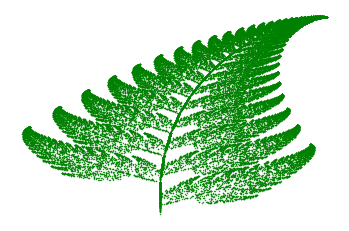

In [6]:
plt.scatter(x, y, s = 0.2, c = 'g') 
plt.axis("off")
plt.show()